In [161]:
import PIL
import scipy.linalg as splin
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

# Import Image

In [162]:
from PIL import Image
im = Image.open("clown.jpg")
im = np.array(im)

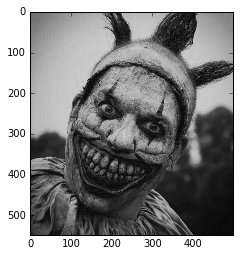

In [163]:
plt.imshow(im)

# SVD
$ X = U S V^\text{T} $, where
$ U = \text{eigen vectors}[XX^\text{T}]$, $ V = \text{eigen vectors}[X^\text{T}X]$, and $S^2 = \text{eigen values}[X^\text{T}X]$.

In [164]:
X = im[:,:,0]
U, s, V = np.linalg.svd(X, full_matrices=True)
S = np.zeros((U.shape[1], V.shape[0]))
S[:len(s), :len(s)] = np.diag(s)

In [165]:
print(U.shape, S.shape, V.shape)

(548, 548) (548, 499) (499, 499)


In [166]:
Scompress20 = np.copy(S)
Scompress10 = np.copy(S)
Scompress2 = np.copy(S)
Scompress20[20:,20:] = 0
Scompress10[10:,10:] = 0
Scompress2[2:,2:] = 0
Xcompress = [U @ Sc @ V for Sc in [Scompress20,Scompress10,Scompress2]]

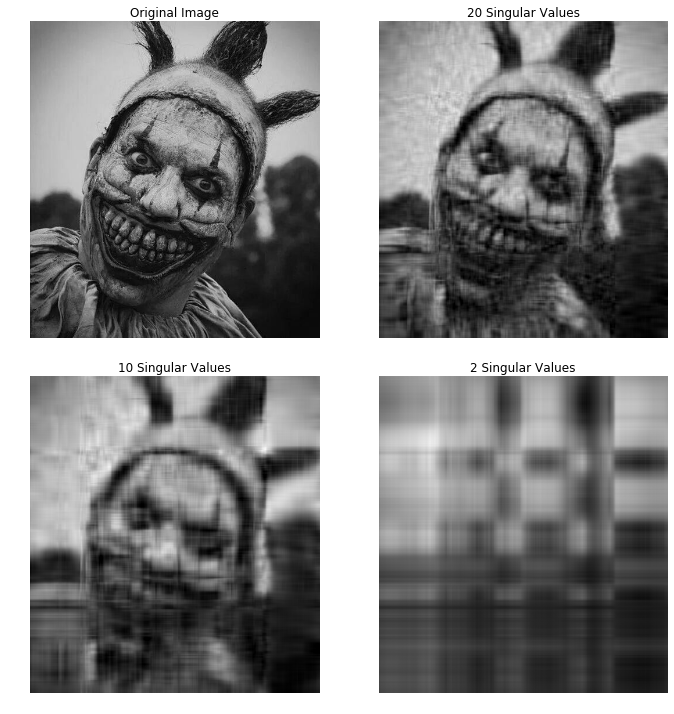

In [167]:
plt.figure(figsize = (10,10))
plt.subplot(221)
plt.imshow(im)
plt.title('Original Image')
plt.axis('off')
plt.subplot(222)
plt.imshow(Image.fromarray(Xcompress[0]))
plt.title('20 Singular Values')
plt.axis('off')
plt.subplot(223)
plt.imshow(Image.fromarray(Xcompress[1]))
plt.title('10 Singular Values')
plt.axis('off')
plt.subplot(224)
plt.imshow(Image.fromarray(Xcompress[2]))
plt.title('2 Singular Values')
plt.axis('off')
plt.tight_layout()

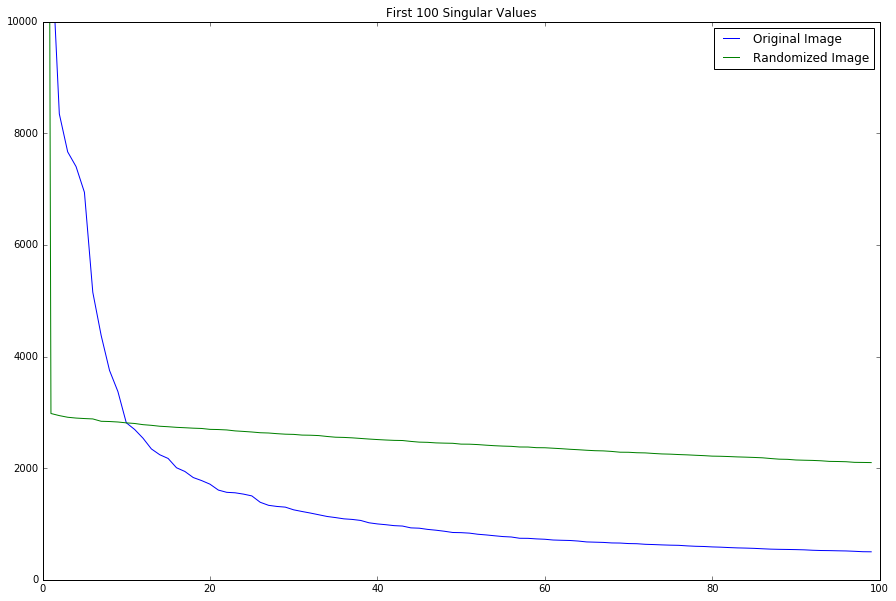

In [187]:
plt.figure(figsize = (15,10))
plt.plot(s[:100], label = "Original Image")
X2 = X.flatten()
np.random.shuffle(X2)
X2 = X2.reshape(X.shape[0], X.shape[1])
U, s2, V = np.linalg.svd(X2, full_matrices=True)
plt.plot(s2[:100], label = "Randomized Image")
plt.ylim([0,10000])
plt.title("First 100 Singular Values")
plt.legend()